In [1]:
import numpy as np
import matplotlib.pyplot as plt

The standard error of an estimator $\hat\theta$
$$
\text{SE}(\hat\theta) = \sqrt{\text{Var}(\hat\theta)}
$$

The the standard error involves unknown parameters, we can estimate it using the sample variance of the estimator
$$
\widehat{\text{SE}}(\hat\theta) = \sqrt{\widehat{\text{Var}}(\hat\theta)}
$$

**Example: Binomial Distribution**

$ X \sim \text{Binomial}(n, p) $

In [2]:
from numpy.random import binomial as B

In [3]:
def obs(n, p, args=(5,5,5)):
    t, u, v = args
    with open(f"./obs/{n}-{p}-{t}-{u}-{v}.txt", 'w') as f:
        for _ in range(t):
            for _ in range(u):
                print('  '.join([str(B(5, 0.5)) for _ in range(v)]), sep='  ', end=' | ', file=f)
                print(file=f)
            print(file=f)
            print('__'*39,file=f)
            print('\n',file=f)

In [7]:
'  '.join([str(B(5, 0.5)) for _ in range(4)])

'3  0  2  1'

In [5]:
obs(10, 0.5, args=(1,1,2))

In [6]:
from itertools import product
nums = list(range(2, 8))

for a in product(nums, repeat=3):
    t,u,v = a
    for p in np.linspace(0.1,3,5):
        obs(10, p, args=(t,u,v))

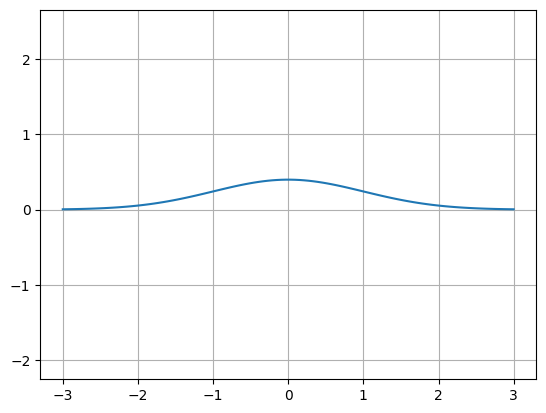

In [8]:
N = lambda mu, sigma, x: np.exp(-(x-mu)**2/(2*sigma**2)) / (sigma*np.sqrt(2*np.pi))

xs = np.linspace(-3, 3, 100)
plt.plot(xs, N(0, 1, xs))
plt.axis('equal')
plt.grid()

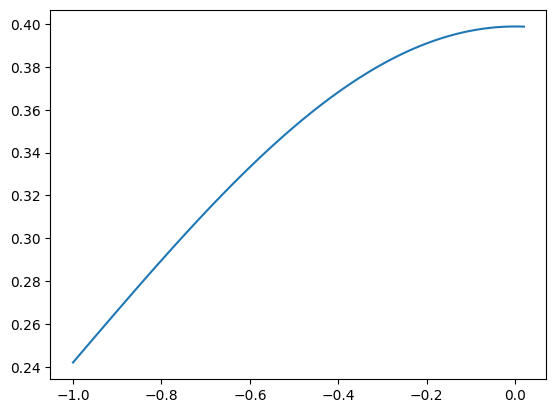

In [9]:
xs = np.linspace(-1, 0.02, 100)
plt.plot(xs, N(0, 1, xs))

dx: 0.5577777777777775, xi:-4.442222222222222, yi: 2.069522275713833e-05
dx: 0.5577777777777775, xi:-3.8844444444444446, yi: 0.00021105477644129165
dx: 0.5577777777777779, xi:-3.326666666666667, yi: 0.0015769004664352667
dx: 0.5577777777777779, xi:-2.768888888888889, yi: 0.008631721003727865
dx: 0.5577777777777775, xi:-2.2111111111111112, yi: 0.03461581203616253
dx: 0.5577777777777775, xi:-1.6533333333333338, yi: 0.10170344638331773
dx: 0.5577777777777779, xi:-1.0955555555555563, yi: 0.21891767767555614
dx: 0.5577777777777784, xi:-0.5377777777777784, yi: 0.3452311789856424


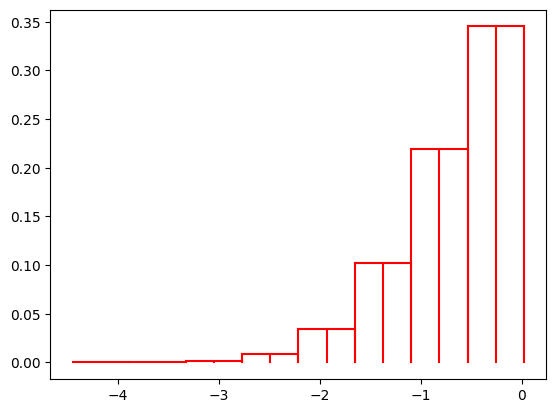

In [10]:
def N(mu, sigma, x): 
    return np.exp(-(x-mu)**2/(2*sigma**2)) / (sigma*np.sqrt(2*np.pi))


t = 0.02
xs = np.linspace(-5,t,10)
tally = 0
for i, x in enumerate(xs):
    if i==0 or i==len(xs)-1:
        continue

    dx = xs[i+1] - xs[i]
    yi = N(0, 1, xs[i])
    print(f"dx: {dx}, xi:{xs[i]}, yi: {yi}")
    tally += yi*dx
    plt.plot([x, x+dx], [yi, yi], 'r')
    for i,l in enumerate(np.linspace(x,x+dx, 3)):
        plt.plot([l, l], [0, yi], 'r')

In [16]:
def rie(N, a, b, mesh=10):
    xs = np.linspace(a,b,mesh)
    tally = 0
    for i, x in enumerate(xs):
        if i==0 or i==len(xs)-1:
            continue
        dx = xs[i+1] - xs[i]
        yi = N(xs[i])
        tally += yi*dx
        plt.plot([x, x+dx], [yi, yi], 'r')
        for i,l in enumerate(np.linspace(x,x+dx, 4)):
            plt.plot([l, l], [0, yi], 'r')
    return tally

1.999832163893993

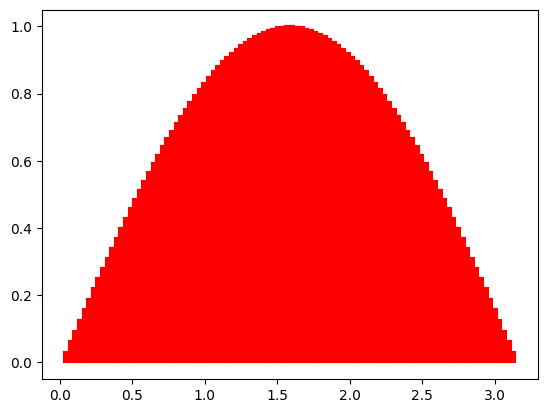

In [17]:
rie(lambda x: np.sin(x), 0, np.pi, mesh=100)

-53.126946766586414

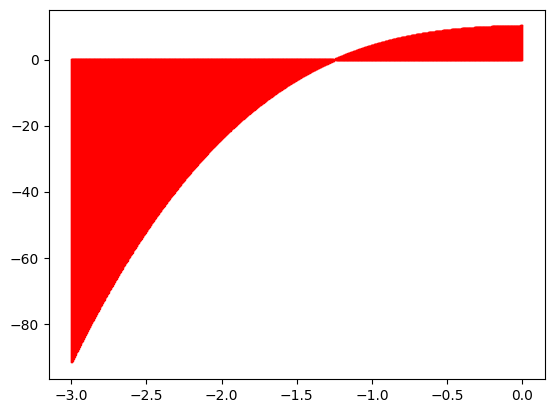

In [18]:
rie(lambda x: 3*x**3 - 2*x**2 +x+10, -3, 0, mesh=1000)

-46.96952908587257

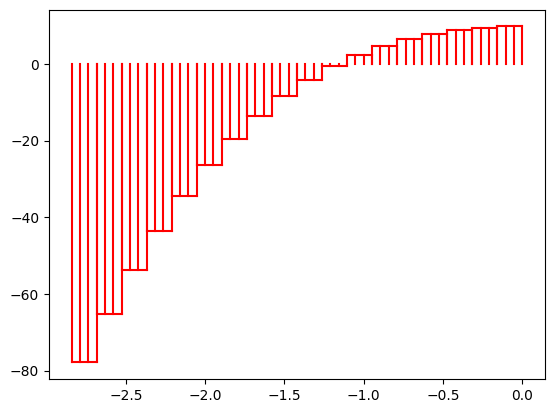

In [19]:
rie(lambda x: 3*x**3 - 2*x**2 +x+10, -3, 0, mesh=20)

-37.10204081632655

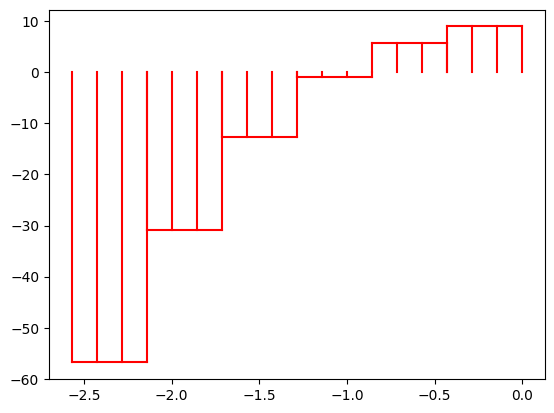

In [20]:
rie(lambda x: 3*x**3 - 2*x**2 +x+10, -3, 0, mesh=8)

In [ ]:
from sympy import exp, sqrt, pi, integrate, oo, Symbol

mu = Symbol('mu', real=True)
sigma = Symbol('sigma', positive=True)
x = Symbol('x', real=True)

N = lambda mu, sigma, x: exp(-(x-mu)**2/(2*sigma**2))/(sigma*sqrt(2*pi))

integrate(N(mu, sigma, x), (x, -oo, 0.02))

In [ ]:
def usum(f, xs, a, b):
    return sum([f(x) * (xs[i]-xs[i-1]) for i, x in enumerate(xs[1:]) if a <= x <= b])

In [ ]:
usum(lambda x: x**2, [0, 1, 2, 3, 4], 0, 4)

In [ ]:
xs = [0, 1, 2, 3, 4]
a = 0
b = 4

In [ ]:
ys = f(xs)
for i in range(xs):
    if i == 0:
        continue
    dx = xs[i] - xs[i-1]
    ys[i] 


In [ ]:
from sympy import *
from sympy.abc import x

from numpy import linspace
from matplotlib.pyplot import plot, show, grid, xlabel, ylabel, title

In [ ]:
# normal distribution

def f(n):
    return 1/sqrt(2*pi)*exp(-(x+n)**2/2)

In [ ]:
expr = 0
for i in range(10):
    expr += f(i)

In [ ]:
lamda = lambdify(x, expr)

In [ ]:
xs = linspace(-10, 10, 100)
lamda(xs)
plot(xs, lamda(xs))

In [ ]:
def symsum(f, n, xs=None):
    '''
    Summation SymPy Lambify Wrapper
    '''
    expr = 0
    for i in range(n):
        expr += f(i)

    lamda = lambdify(x, expr)

    if xs is not None:
        plot(xs, lamda(xs))

    return lamda

In [ ]:
# animation
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import *
fig, ax = subplots()
ax.set_ylim(0, 1)
line, = ax.plot([], [], lw=2)
xs = linspace(-52, 15, 100)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(xs, symsum(f, i+1)(xs))
    ax.relim()
    ax.autoscale_view()
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=40, interval=200, blit=True)
anim.save('normal_distribution.gif', writer='imagemagick')

In [ ]:
from sympy.abc import x, y
